**KNN – Handwritten Digit Classification**

Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Load Dataset

In [2]:
# Optdigits loading

train_data = pd.read_csv("optdigits.tra", header=None)
test_data  = pd.read_csv("optdigits.tes", header=None)

X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [3]:
# View Shapes of X and y
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3823, 64)
y_train shape: (3823,)
X_test shape: (1797, 64)
y_test shape: (1797,)


Visualize few digit images

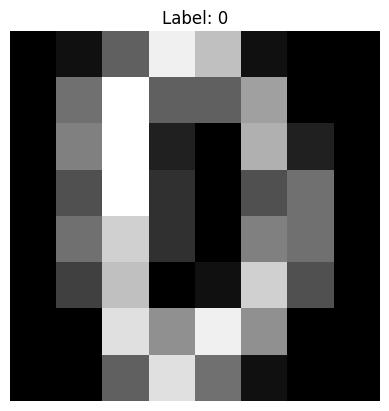

In [4]:
# Visualization (single digit)
import matplotlib.pyplot as plt

i = 0   # any index from 0 to len(X_train)-1

plt.imshow(X_train.iloc[i].values.reshape(8, 8), cmap="gray")
plt.title(f"Label: {y_train.iloc[i]}")
plt.axis("off")
plt.show()

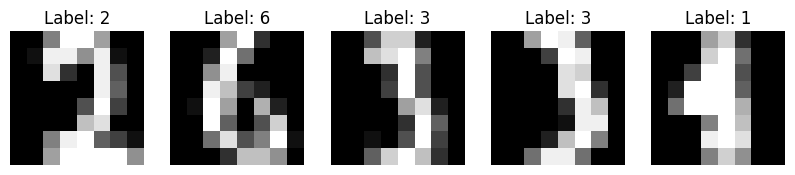

In [5]:
# visualization (multiple random digits)
import matplotlib.pyplot as plt

random_indices = np.random.choice(len(X_train), 5, replace=False)

plt.figure(figsize=(10,4))
for i, idx in enumerate(random_indices):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train.iloc[idx].values.reshape(8,8), cmap="gray")
    plt.title(f"Label: {y_train.iloc[idx]}")
    plt.axis("off")

plt.show()


Split dataset into training and testing sets

**Using the predefined train–test split**
>Optdigits already provides:
- optdigits.tra → training data
- optdigits.tes → testing data

In [6]:
# Already split by dataset design
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Optdigits dataset already provides separate training and testing files

Training samples: 3823
Testing samples: 1797


Applying Feature Scaling

In [7]:
# Applying Feature Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()
# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)

In [8]:
# Verifying scaling
print("Mean of scaled training data:", X_train_scaled.mean())
print("Std of scaled training data:", X_train_scaled.std())

Mean of scaled training data: -6.6938636457258324e-18
Std of scaled training data: 0.9842509842514765


Training KNN Model (K = 3)

In [9]:
# Training KNN Model (K = 3) & Evaluate Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
# Train model
knn.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
# Predict on test data
y_pred = knn.predict(X_test_scaled)

In [11]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy (K=3):", accuracy)

KNN Accuracy (K=3): 0.9649415692821369


Trying Multiple K Values and Storing Results

In [12]:
# Trying Multiple K Values and Storing Results
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5, 7, 9]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(acc)
    print(f"K = {k}, Accuracy = {acc}")

K = 3, Accuracy = 0.9649415692821369
K = 5, Accuracy = 0.9649415692821369
K = 7, Accuracy = 0.9638286032276016
K = 9, Accuracy = 0.9616026711185309


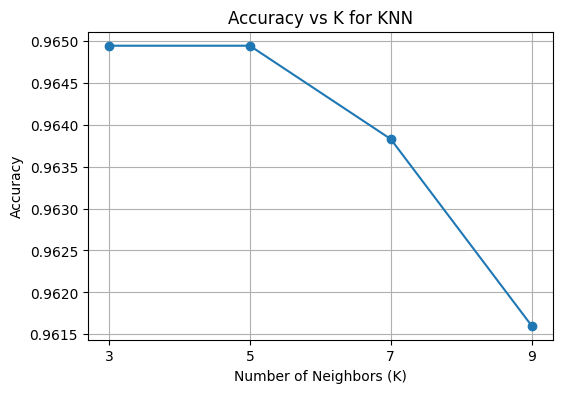

In [13]:
# Plot Accuracy vs K

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for KNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()


**Best K** is **3** or **5** give the highest accuracy
>Prefer K = 5 because:
- Same accuracy as K=3
- Slightly more stable (less sensitive to noise)

Generating Confusion Matrix 

In [14]:
# Generate Confusion Matrix (Misclassified Digits)
from sklearn.neighbors import KNeighborsClassifier

knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train_scaled, y_train)

y_pred = knn_best.predict(X_test_scaled)

In [15]:
# Create Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[178   0   0   0   0   0   0   0   0   0]
 [  0 178   1   0   0   0   3   0   0   0]
 [  0   8 164   0   1   1   1   0   2   0]
 [  0   1   1 174   0   0   0   1   4   2]
 [  0   1   0   0 176   0   0   0   2   2]
 [  0   0   0   0   1 180   0   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 175   1   3]
 [  0  10   0   1   0   2   0   0 159   2]
 [  0   0   0   4   0   3   1   1   2 169]]


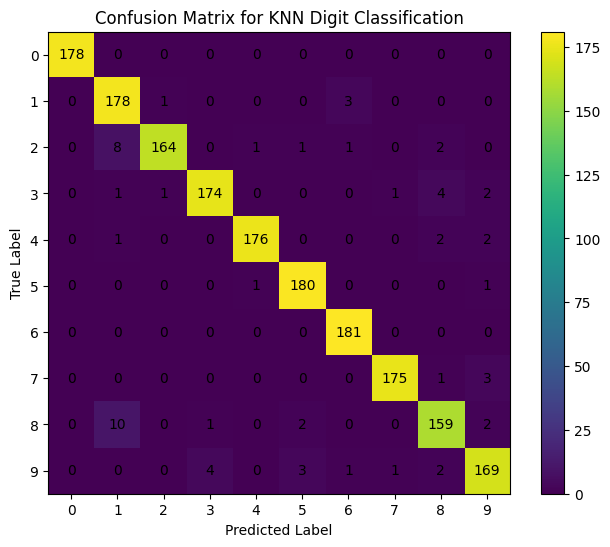

In [16]:
# Visualize Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.imshow(cm)
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Digit Classification")

plt.xticks(range(10))
plt.yticks(range(10))

# Annotate values
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

Displaying 5 Test Images with Predicted Labels

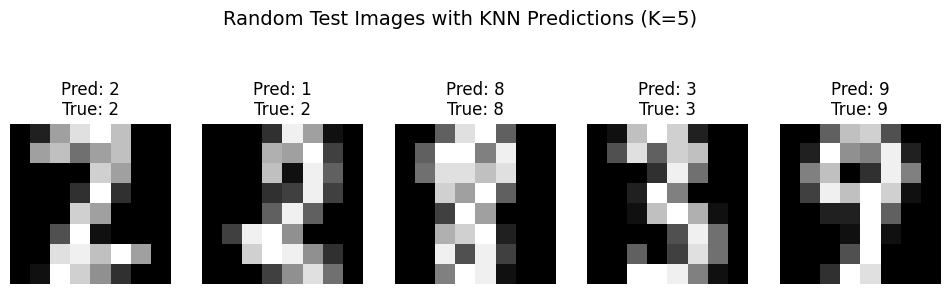

In [17]:
# Displaying 5 Random Test Images with Predictions
import numpy as np
import matplotlib.pyplot as plt

# Pick 5 random test indices
random_indices = np.random.choice(len(X_test), 5, replace=False)

plt.figure(figsize=(12,4))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i+1)
    
    # Reshape and display image
    plt.imshow(X_test.iloc[idx].values.reshape(8, 8), cmap="gray")
    
    # Add title with prediction
    plt.title(
        f"Pred: {y_pred[idx]}\nTrue: {y_test.iloc[idx]}"
    )
    plt.axis("off")

plt.suptitle("Random Test Images with KNN Predictions (K=5)", fontsize=14)
plt.show()
